## 구간 합

- 구간합 : 합 배열을 이용하여 시간 복잡도를 더 줄이기 위해 사용하는 특수한 목적의 알고리즘

합 배열은 기존의 배열을 전처리한 배열이라고 생각하면 된다.  
이렇게 합 배열을 미리 구해놓으면 기존 배열의 일정 범위 합을 구하는 시간 복잡도가 O(N)에서 O(1)로 감소한다.  

### 키워드
- 어떤 배열에서 특정 범위의 합을 구하는 문제
- 배열의 특정 구간 합을 직접 구하려면 모든 원소를 일일이 더해야 하므로 시간이 많이 걸릴 수 있다. 이 과정을 효율적으로  만들기 위해 구간 합 알고리즘을 사용

### 핵심 이론
- 합 배열 : 배열의 각 원소에 대해 해당 원소까지의 합을 미리 구해 놓은 배열  
`S[i] = A[0] + A[1] + ... + A[i]`

- 합 배열 S를 만드는 공식
    -  `S[i] = S[i-1] + A[i]`

- 구간 합을 구하는 공식
    - `S[j] - S[i-1] = A[i] + A[i+1] + ... + A[j]`


- A[2]~ A[4] 구간 합을 합 배열로 구하는 과정
    - `S[4] = A[0] + A[1] + A[2] + A[3] + A[4]`
    - `S[1] = A[0] + A[1]`
    - `S[4] - S[1] = A[2] + A[3] + A[4]`

#### 1. 기본 배열과 구간 합 배열 만들기

In [14]:
# 기본 배열
A = [1, 2, 3, 4, 5]

# 합 배열
S = [0] * (len(A) + 1) # A = 5 # S = [0, 0, 0, 0, 0]

# 합 배열 계산
for i in range(1, len(A) + 1): # (1, 6) -> 1 ~ 5
    S[i] = S[i - 1] + A[i - 1] 
''' 
i = 1 , S[1] = S[0] + A[0], 0 + 1 = 1
i = 2 , S[2] = S[1] + A[1], 1 + 2 = 3
i = 3 , S[3] = S[2] + A[2], 3 + 3 = 6
i = 4 , S[4] = S[3] + A[3], 6 + 4 = 10
i = 5 , S[5] = S[4] + A[4], 10 + 5 = 15
'''

print(A)
print(S)
print(type(S))

[1, 2, 3, 4, 5]
[0, 1, 3, 6, 10, 15]
<class 'list'>


### 디버깅 체크
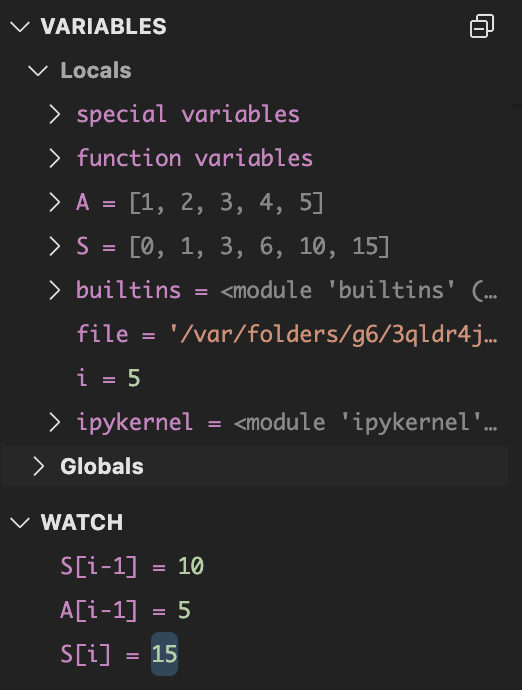

#### 2. 구간 합 계산하기

In [18]:
# 구간 합 계산 (A[2]부터 A[4]까지의 합)

i = 2
j = 4

segment_sum = S[j] - S[i-1]
print(f"A[{i}]부터 A[{j}]까지의 구간 합 : ", segment_sum)

A[2]부터 A[4]까지의 구간 합 :  9


---
구간 합 구하기 5 : 백준 11660번

- 문제
    - `N*N`개의 수가 `N*N`크기의 표에 채워져있다. (N = 4)
    - (x1, y1)부터 (x2, y2)까지 합을 구하는 프로그램을 작성하시오. (x, y)는 x행 y열을 의미

- 입력
    - 첫째 줄에 표의 크기 N과 합을 구해야 하는 횟수 M이 주어진다. ($1 <= N <= 1024, 1 <= M <= 100,000$)
    - 둘째 줄부터 N개의 줄에 표에 채워져있는 수가 1행부터 차례대로 주어진다.
    - 다음 M개의 줄에는 네 개의 정수 x1, y1, x2, y2가 주어지며, (x1, y1)부터 (x2, y2)까지 합을 구해야 한다.
    - 표에 채워져 있는 수는 1,000보다 작거나 같은 자연수이다.

- 출력
    - 총 M줄에 걸쳐 (x1, y1)부터 (x2, y2)까지 합을 출력


In [28]:
# 구간 합 실전 문제 - 백준 11660번 (정답은 파이썬 파일)
# sys.stdin.readline()이 주피터노트북에서 실행되지 않음

# 예제 입력 데이터
n, m = 4, 3  # 예시로 배열 크기와 쿼리 수를 미리 정의
A_input = [
    "1 2 3 4",
    "2 3 4 5",
    "3 4 5 6",
    "4 5 6 7"
]
queries = [
    (2, 2, 3, 4),
    (3, 4, 3, 4),
    (1, 1, 4, 4)
]

A = [[0] * (n + 1)]
D = [[0] * (n + 1) for _ in range(n + 1)]

# A 배열 채우기
for i in range(n):
    A_row = [0] + [int(x) for x in A_input[i].split()]
    A.append(A_row)

# D 배열 채우기
for i in range(1, n + 1):
    for j in range(1, n + 1):
        D[i][j] = D[i][j - 1] + D[i - 1][j] - D[i - 1][j - 1] + A[i][j]

# 쿼리 처리 및 결과 출력
results = []
for x1, y1, x2, y2 in queries:
    result = D[x2][y2] - D[x1 - 1][y2] - D[x2][y1 - 1] + D[x1 - 1][y1 - 1]
    results.append(result)

# 결과 출력
for result in results:
    print(result)

27
6
64
